In [1]:
using Plots

https://web.mit.edu/jorloff/www/chaosTalk/double-pendulum/double-pendulum-en.html

In [2]:
g = 9.81
h = 0.01
n = 2000
x, y = 0, 0
m1, m2, l1, l2 = 1, 1, 1, 1
print("")

In [3]:
function draw(data)
    anime = @animate for i in 1:n
        d = data[i]
        plot(title = "double pendulum", xlims = (-3,3), ylims = (-3,3), aspect_ratio = 1)
        plot!([i*d[1]/100 for i in 1:100], [i*d[2]/100 for i in 1:100], label = "main line")
        plot!([d[1] + i*(d[3]-d[1])/100 for i in 1:100], [d[2] + i*(d[4]-d[2])/100 for i in 1:100], label = "tail line")
    end
    return anime
end

draw (generic function with 1 method)

In [4]:
function ω1_prim(θ1, θ2, ω1, ω2)
    res = 0
    res -= g * (2*m1 + m2) * sin(θ1)
    res -= m2 * g * sin(θ1 - 2*θ2)
    res -= 2 * sin(θ1 - θ2) * m2 * (ω2^2 * l2 + ω1^2 * l1 * cos(θ1-θ2))
    res /= l1 * (2*m1 + m2 - m2 * cos(2*θ1 - 2*θ2))
    return res
end

ω1_prim (generic function with 1 method)

In [5]:
function ω2_prim(θ1, θ2, ω1, ω2)
    res = 0
    res += 2 * sin(θ1 - θ2) * (ω1^2 * l1 * (m1 + m2) + g * (m1 + m2) * cos(θ1) + ω2^2 * l2 * m2 * cos(θ1 - θ2))
    res /= l2 * (2*m1 + m2 - m2 * cos(2*θ1 - 2*θ2))
    return res
end

ω2_prim (generic function with 1 method)

In [6]:
function run(θ1, θ2)
    Res = []
    ω1 = 0
    ω2 = 0
    for i in 1:n
        θ1 += h * ω1
        θ2 += h * ω2
        ω1 += h * ω1_prim(θ1, θ2, ω1, ω2)
        ω2 += h * ω2_prim(θ1, θ2, ω1, ω2)
        x1, y1 = x - l1 * sin(θ1), y - l1 * cos(θ1)
        push!(Res, [x1, y1, x1 - l2 * sin(θ2), y1 - l2 * cos(θ2)])
    end
    return Res
end

run (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = c:\Users\Szymon\MOWNiT\projekt2\anime1.gif
└ @ Plots C:\Users\Szymon\.julia\packages\Plots\cPJQu\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\Szymon\\MOWNiT\\projekt2\\anime1.gif")
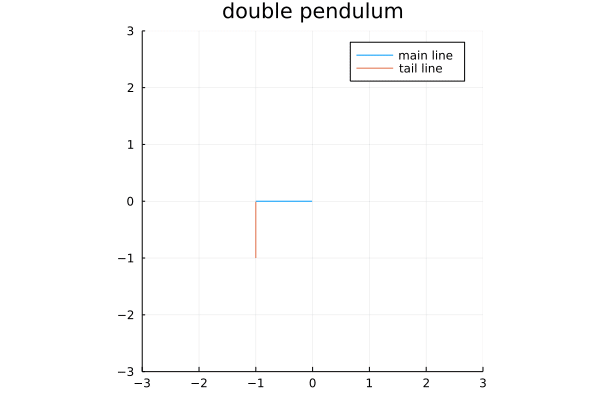

In [7]:
results = run(π/2, 0)
gif(draw(results), "anime1.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = c:\Users\Szymon\MOWNiT\projekt2\anime2.gif
└ @ Plots C:\Users\Szymon\.julia\packages\Plots\cPJQu\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\Szymon\\MOWNiT\\projekt2\\anime2.gif")
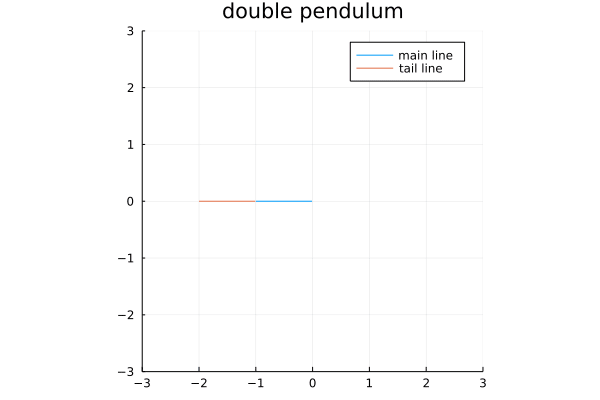

In [8]:
results = run(π/2, π/2)
gif(draw(results), "anime2.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = c:\Users\Szymon\MOWNiT\projekt2\anime3.gif
└ @ Plots C:\Users\Szymon\.julia\packages\Plots\cPJQu\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\Szymon\\MOWNiT\\projekt2\\anime3.gif")
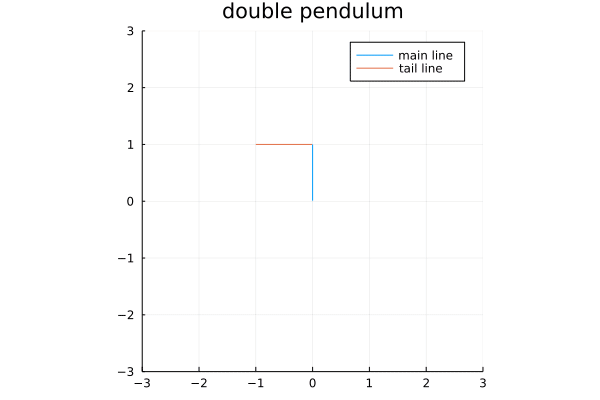

In [9]:
results = run(π, π/2)
gif(draw(results), "anime3.gif", fps = 30)